# New York State Rₜ
> Daily updates on NYS Rₜ.

- badges: true
- comments: true
- categories: [jupyter]
- permalink: /daily/

In [1]:
#hide
from babino2020masks.core import *
from babino2020masks.lasso import *

Matplotlib is building the font cache; this may take a moment.


In [2]:
#hide
ny = API(api_settings['NYS'][:2], **api_settings['NYS'][2])
df = ny.get_all_data_statewide()

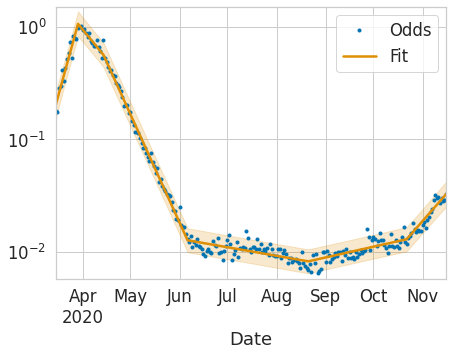

In [3]:
#hide_input
lics = LassoICSelector(df['Odds'], 'bic')
lics.fit_best_alpha()
df['Fit'], df['Odds_l'], df['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(df, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(7, 5))

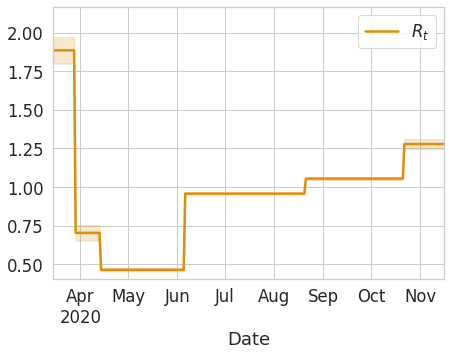

In [4]:
#hide_input
df['$R_t$'], df['Rl'], df['Ru'] = lics.rt()
ax = plot_data_and_fit(df, 'Date', None, '$R_t$', 'Rl', 'Ru', figsize=(7, 5), logy=False, palette=[colorblind[1],colorblind[1]])

In [5]:
#hide_input
print(f'Rₜ on {df.Date.iloc[-1]:%B %d %Y}: {df["$R_t$"].iloc[-1]:2.3} ({df["Rl"].iloc[-1]:2.3}-{df["Ru"].iloc[-1]:2.3} 95% C.I)')

Rₜ on November 16 2020: 1.28 (1.25-1.31 95% C.I)


In [6]:
#hide_input
from datetime import datetime
print(f'Last updated on {datetime.today():%m/%d/%Y %H:%M:%S}')

Last updated on 11/18/2020 20:37:36


* [Source code](https://github.com/ababino/babino2020masks)
* [Preprint](https://arxiv.org/abs/2006.05532)